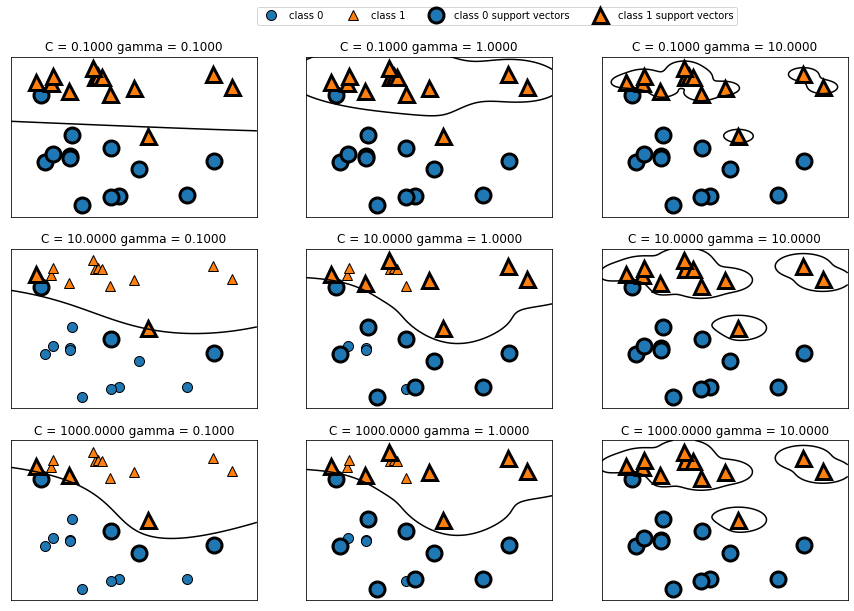

In [1]:
import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(3,3,figsize=(15,10))
for ax, C in zip(axes, [-1,1,3]):
    for a, gamma in zip(ax, [-1, 0, 1]):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(["class 0", "class 1", "class 0 support vectors", 
"class 1 support vectors"], ncol=4,loc=(1,1.2))

In [2]:
import pandas as pd
df = pd.read_csv("c:/data/customer/customer.csv")
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [3]:
cols=["Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']
X=df[cols]
y=df['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [4]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Churn'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [5]:
X=df_samp[cols]
y=df_samp['Churn']

<AxesSubplot:>

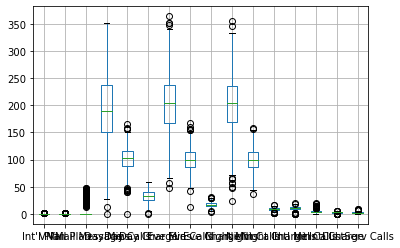

In [8]:
X.boxplot()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X))

<AxesSubplot:>

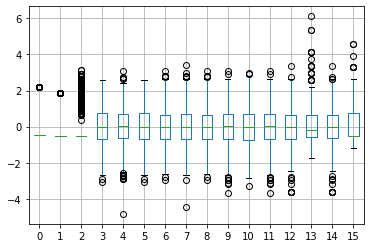

In [10]:
X_scaled.boxplot()

In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm=SVC()
n_estimators=10
model=BaggingClassifier(base_estimator=svm,n_estimators=n_estimators,
max_samples=1/n_estimators,n_jobs=2)

In [13]:
import numpy as np
import math
from sklearn.model_selection import cross_val_score
costs=np.logspace(-10,3,14)
scores=[]
for c in costs:
    model.base_estimator.C=c
    this_scores=cross_val_score(model,X_scaled,y,n_jobs=2,cv=3)
    m=np.mean(this_scores)
    print(c,'==>',m)
    scores.append(m)

1e-10 ==> 0.562111801242236
1e-09 ==> 0.5693581780538303
1e-08 ==> 0.6242236024844722
1e-07 ==> 0.5631469979296067
1e-06 ==> 0.5610766045548654
1e-05 ==> 0.5
0.0001 ==> 0.5
0.001 ==> 0.5610766045548654
0.01 ==> 0.5600414078674948
0.1 ==> 0.5496894409937888
1.0 ==> 0.7691511387163561
10.0 ==> 0.7971014492753623
100.0 ==> 0.7846790890269152
1000.0 ==> 0.7877846790890269


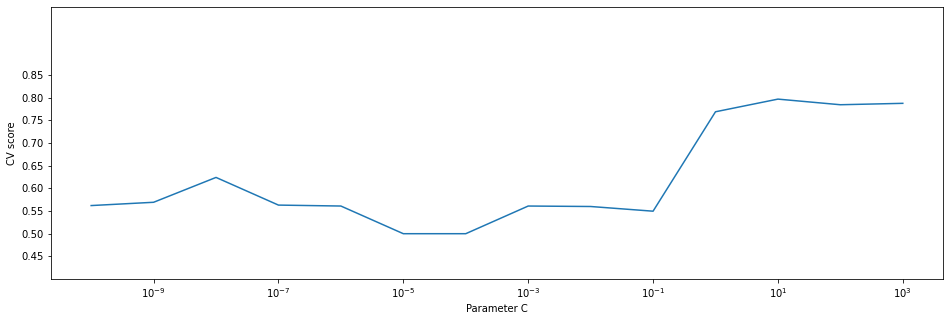

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,5)
plt.semilogx(costs, scores)
locs, labels=plt.yticks()
plt.yticks(locs)
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.4,1)
plt.show()